In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)   #개선
    sum_exp_a = sum(np.exp(a-c))
    y = exp_a/sum_exp_a
    return y

In [3]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 ONE-HOT 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [4]:
class simpleNet:
    def __init__(self):
        np.random.seed(0) #항상 동일한 랜덤값 출력을 위함 (수업 목적)
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [5]:
net = simpleNet()

In [6]:
x = np.array([0.6, 0.9]) # 입력
t = np.array([0.0, 0.0, 1.0]) #정답, TARGET, 정답의 확률

In [7]:
net.W #어떤값으로 초기화 되어있는지 확인

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

### 입력값을 이용하여 FORWARD 방향 연산해보기

In [8]:
pred = net.predict(x)

In [9]:
print(pred)

[ 3.07523529  1.92089652 -0.2923073 ]


In [10]:
y = softmax(pred)

In [11]:
print(y)

[0.74088333 0.23357527 0.0255414 ]


In [12]:
np.argmax(y)

0

In [13]:
np.argmax(t)

2

### 동일한 입력값과 정답을 이용하여 loss 구해보기

In [14]:
net.loss(x,t)

3.6674507891066104

### Gradient 구해보기

In [15]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [16]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [17]:
net.W

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

참고) lambda
```
lambda 인자리스트: 표현식
```

In [18]:
def f(w): #Loss 산의 높이
    return net.loss(x, t)

위처럼 해도 되지만, 아래처럼 lambda 를 써서 간단히 하는 것도 좋은 방법. 단, 인자로 들어가는 w는 dummy

In [19]:
f = lambda w: net.loss(x, t)

In [20]:
dW = numerical_gradient(f, net.W) # 6 방향의 기울기

In [21]:
print(dW)

[[ 0.44452826  0.14014461 -0.58467287]
 [ 0.66679239  0.21021692 -0.87700931]]


In [22]:
net.W

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

생각해보기
* 각 숫자들의 의미를 생각해보세요 (2020/11/24일 수업)
* 교재 135쪽 참조

아래와 같은 방식으로 W를 갱신할 수 있음
```
net.W = net.W - 0.01 * dW
```

### 학습하기

In [23]:
class simpleNet2:
    def __init__(self):
        np.random.seed(0) #항상 동일한 랜덤값 출력을 위함 (수업 목적)
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
    
    def gradient(self, x, t):
        f = lambda w: net.loss(x, t)
        dW = numerical_gradient(f, net.W) # 6 방향의 기울기
        
        return dW

In [24]:
net2 = simpleNet2()

In [25]:
net2.W

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [26]:
x

array([0.6, 0.9])

In [27]:
t

array([0., 0., 1.])

In [28]:
net2.gradient(x, t)

array([[ 0.44452826,  0.14014461, -0.58467287],
       [ 0.66679239,  0.21021692, -0.87700931]])

* 학습이 되기 전 랜덤값으로 초기화된 weight로 결과 맞추는지 확인해보기

In [29]:
net2.predict(x)

array([ 3.07523529,  1.92089652, -0.2923073 ])

In [30]:
softmax(net2.predict(x))

array([0.74088333, 0.23357527, 0.0255414 ])

In [31]:
np.argmax(softmax(net2.predict(x))) #추론한 클래스

0

In [32]:
np.argmax(t) #정답 클래스

2

In [33]:
np.argmax(softmax(net2.predict(x))) == np.argmax(t)

False

* Hyperparameters

In [34]:
learning_rate = 0.1
steps = 100

* Train the network !

In [35]:
net2.W

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [36]:
net2.loss(x, t)

3.6674507891066104

In [37]:
vloss = np.zeros((steps, 1))
for i in range(steps):
    grad = net2.gradient(x, t)
    net2.W = net2.W - learning_rate * grad
    
    loss_i = net2.loss(x, t)
    vloss[i] = loss_i
    #print(i, grad)
print('Done !')

Done !


In [38]:
net2.W

array([[-2.68123023, -1.00128894,  6.82546671],
       [-4.42703066, -0.23461124,  7.7928152 ]])

In [39]:
net2.loss(x, t)

6.60679616344305e-06

Text(0.5, 1.0, 'lr = 0.1')

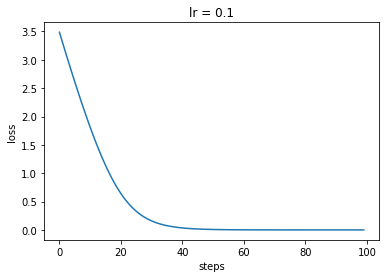

In [40]:
plt.plot(vloss)
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('lr = {}'.format(learning_rate))

### Prediction / Infererence (추론과정)

In [41]:
net2.predict(x)

array([-5.59306573, -0.81192348, 11.10881371])

In [42]:
softmax(net2.predict(x))

array([5.57780093e-08, 6.65099633e-06, 9.99993293e-01])

In [43]:
np.argmax(softmax(net2.predict(x))) #추론한 클래스

2

In [44]:
np.argmax(softmax(net2.predict(x))) == np.argmax(t)

True